In [ ]:
# Heart Disease Project Possbilitie of having heart disease 

# Importing Library 
# Perform EDA
# See Statistical Insgits 
# Conclusion 

In [ ]:
import pandas as pd
data=pd.read_csv("/content/heart.csv")

In [ ]:
from scipy import stats as st
from math import factorial
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns

import heapq

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.shape

(918, 12)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Data type categorical and numerical both 

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
#Take a closer look at numeric and categorical columns using the describe() method.

# For allkind of pataient those are suffering with deases and also those are not

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


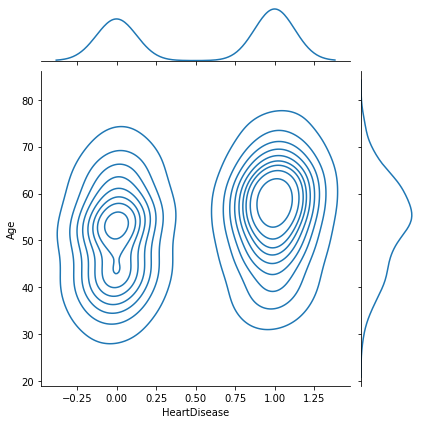

In [ ]:
sns.jointplot(x ='HeartDisease', y ='Age', data = data, kind ='kde')
# KDE shows the density where the points match up the most

#1 those who are having heart disease 
#those are healthy 

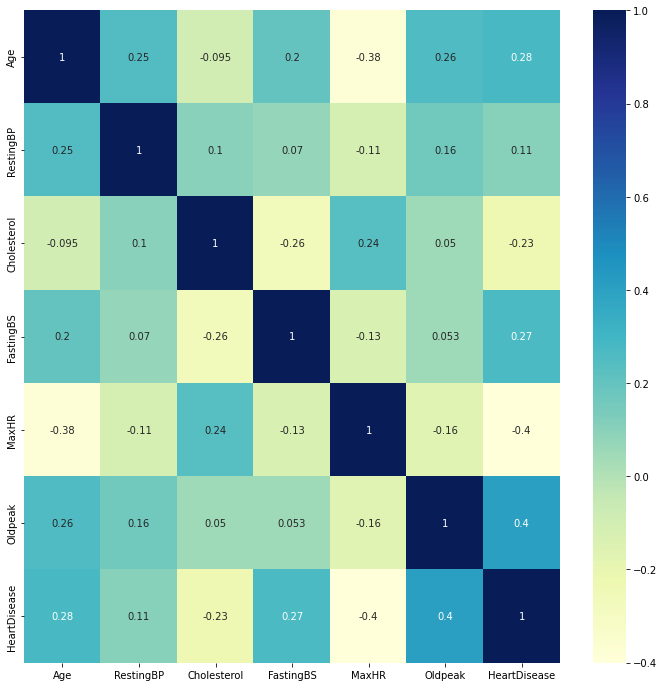

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(12,12))

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()


In [ ]:
#pivot table to see how different Age influnces on heart disease 

person_health_status = pd.pivot_table(data, index = 'Age', columns = 'HeartDisease', 
                               values = 'ChestPainType', aggfunc = 'count', margins=True)
person_health_status

HeartDisease,0,1,All
Age,,,
28,1.0,NaN,1
29,3.0,NaN,3
30,1.0,NaN,1
31,1.0,1.0,2
32,3.0,2.0,5
33,1.0,1.0,2
34,5.0,2.0,7
35,7.0,4.0,11
36,4.0,2.0,6


In [ ]:
#HeartDisease rate for customers with different age.

person_health_status['HeartDisease'] = (person_health_status[1] /person_health_status['All']) * 100
person_health_status

HeartDisease,0,1,All,HeartDisease
Age,,,,
28,1.0,NaN,1,NaN
29,3.0,NaN,3,NaN
30,1.0,NaN,1,NaN
31,1.0,1.0,2,50.000000
32,3.0,2.0,5,40.000000
33,1.0,1.0,2,50.000000
34,5.0,2.0,7,28.571429
35,7.0,4.0,11,36.363636
36,4.0,2.0,6,33.333333


#Take a closer look at numeric and categorical columns using the describe() method. To see statistics

In [ ]:
# Patient those are healthy 

healthy_patient=data[data['HeartDisease']==0]
healthy_patient.describe().T

# Statistics of healthy patient  on numerical columns

,count,mean,std,min,25%,50%,75%,max
Age,410.0,50.551220,9.444915,28.0,43.00,51.0,57.00,76.0
RestingBP,410.0,130.180488,16.499585,80.0,120.00,130.0,140.00,190.0
Cholesterol,410.0,227.121951,74.634659,0.0,197.25,227.0,266.75,564.0
FastingBS,410.0,0.107317,0.309894,0.0,0.00,0.0,0.00,1.0
MaxHR,410.0,148.151220,23.288067,69.0,134.00,150.0,165.00,202.0
Oldpeak,410.0,0.408049,0.699709,-1.1,0.00,0.0,0.60,4.2
HeartDisease,410.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [ ]:
# statistics on categorical columns

healthy_patient.describe(include=['object']).T

,count,unique,top,freq
Sex,410,2,M,267
ChestPainType,410,4,ATA,149
RestingECG,410,3,Normal,267
ExerciseAngina,410,2,N,355
ST_Slope,410,3,Up,317


In [ ]:
# Patients those are having heart disease 
infected_patients=data[data['HeartDisease']==1]

#Statistic of patient those are having heart disease 

infected_patients.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,508.0,55.899606,8.727056,31.0,51.0,57.0,62.00,77.0
RestingBP,508.0,134.185039,19.828685,0.0,120.0,132.0,145.00,200.0
Cholesterol,508.0,175.940945,126.391398,0.0,0.0,217.0,267.00,603.0
FastingBS,508.0,0.334646,0.472332,0.0,0.0,0.0,1.00,1.0
MaxHR,508.0,127.655512,23.386923,60.0,112.0,126.0,144.25,195.0
Oldpeak,508.0,1.274213,1.151872,-2.6,0.0,1.2,2.00,6.2
HeartDisease,508.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


In [ ]:
infected_patients.describe(include=['object']).T

,count,unique,top,freq
Sex,508,2,M,458
ChestPainType,508,4,ASY,392
RestingECG,508,3,Normal,285
ExerciseAngina,508,2,Y,316
ST_Slope,508,3,Flat,381


In [ ]:
# Conclusion 

# Age per above data :

# Heart disease can be in the age of 31 
# Person age more than 50 has higher changes of having heart disease 
# Person age more than 55 must be veru carefull 
# Cholesterol more than 220 is dangerous for a person

#Scope of Work 

# We need to analyse with other factor also like - alchohal or sigrate conjumption 
# Need more data of patients to see more insgits 
